## Imports

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

from skimage import io
from sklearn.cluster import MiniBatchKMeans

from ipywidgets import interact, IntSlider

from plot_utils import plot_utils

In [9]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 12)

## Preprocessing

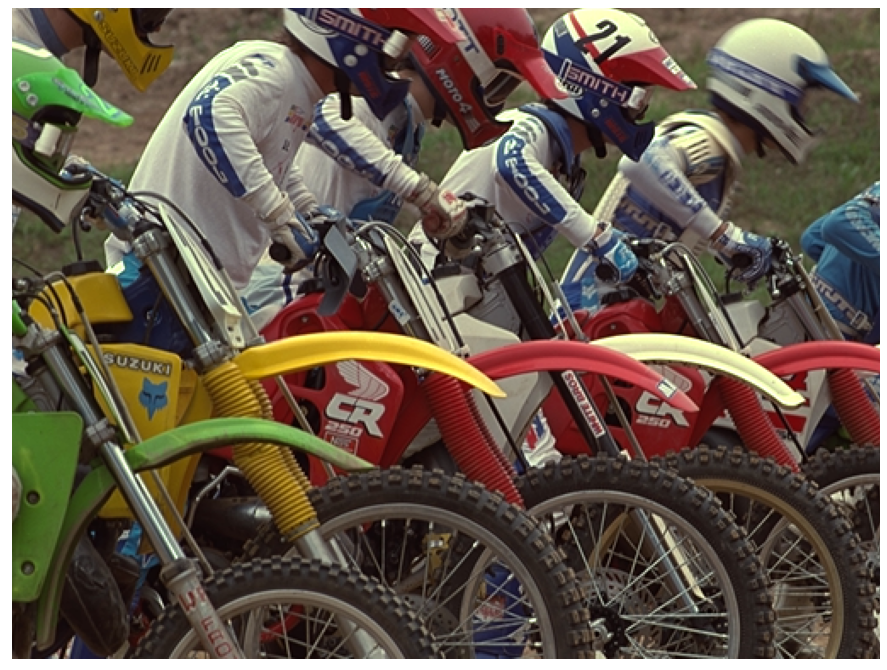

In [10]:
img = image.imread('images/I05.BMP')
ax = plt.axes(xticks=[], yticks=[]);
ax.imshow(img)

In [11]:
print("Image shape: ", img.shape)
img_data = (img/255.0).reshape(-1, 3)
print("Resized into one vector: ", img_data.shape)

Image shape:  (384, 512, 3)
Resized into one vector:  (196608, 3)


## Color space using Point Clouds

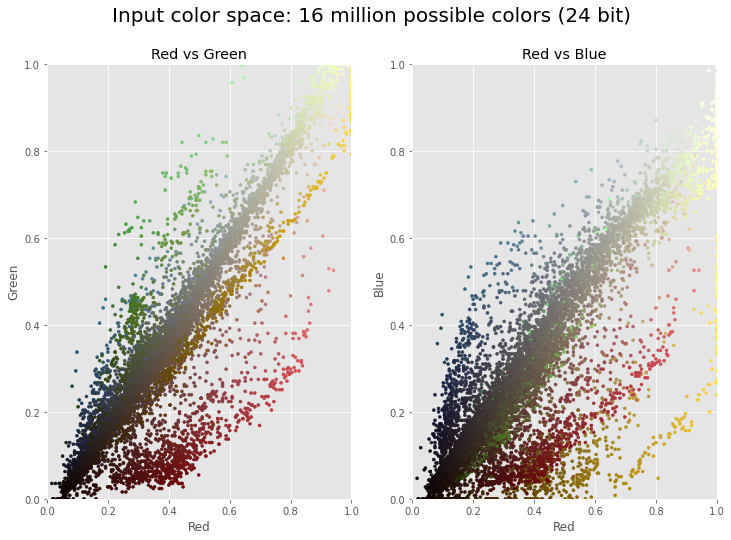

In [12]:
x = plot_utils(img_data, title='Input color space: 16 million possible colors (24 bit)')
x.colorSpace()

## K-Means Reduced Color Space

**K-means Algorithm**:

1. Initialization: Randomly sample $k$ colors from the input image. These are the initial $k$ means $\mu_1,\mu_2,...,\mu_k$.


2. For each pixel in the image, assign it to its nearest mean given by $$c^{(i)} := \textrm{argmin}_{j}\left \|x^{(i)} - \mu_j \right \|^2$$


3. Update the means using the pixel assignments from Step 2. $$\mu_j := \frac{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}x^{(i)}}{\sum_{i}^{n}1\left \{c^{(i)} = j  \right \}}$$


4. Repeat Steps 2 and 3 until convergence.

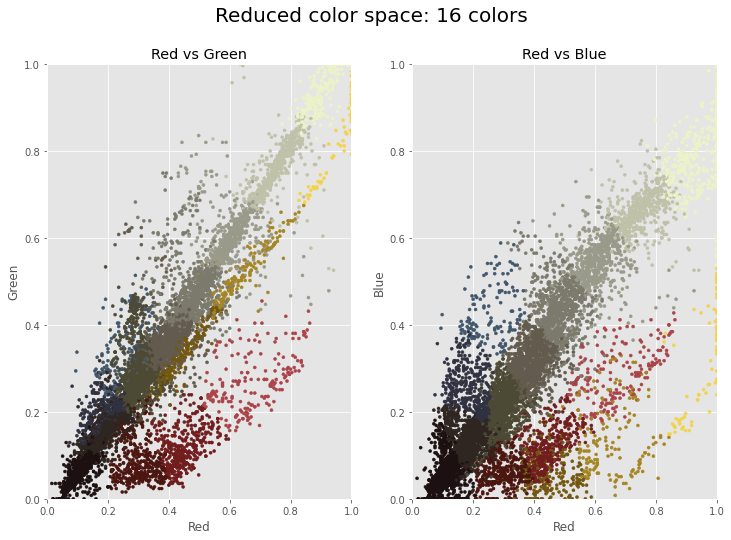

In [13]:
kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title="Reduced color space: 16 colors")
y.colorSpace()

## K-Means Image Compression (Interactive)

In [15]:
img_dir = 'images/'
@interact
def color_compression(
    image=sorted(os.listdir(img_dir)), 
    k=IntSlider(min=1, max=256, step=1, value=16, continuous_update=False, layout=dict(width='100%'))
):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=30)
    
    ax1.set_title('Original')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(input_img)
    
    ax2.set_title('Compressed')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(k_img)
        
    plt.show()

interactive(children=(Dropdown(description='image', options=('I01.BMP', 'I02.BMP', 'I03.BMP', 'I04.BMP', 'I05.…